# Gene x Noise interaction analysis

Using the recoding gene level dosage to do Gene x Noise interaction analysis

In [3]:
# Common variables Columbia's cluster
UKBB_PATH=$HOME/UKBiobank
UKBB_yale=$HOME/UKBiobank_Yale_transfer
USER_PATH=$HOME/working
container_lmm=$HOME/containers/lmm.sif
container_marp=$HOME/containers/marp.sif
container_annovar=$HOME/containers/gatk4-annovar.sif
hearing_pheno_path=$UKBB_PATH/phenotype_files/hearing_impairment
tpl_file=$USER_PATH/bioworkflows/admin/csg.yml
formatFile_fastgwa=$USER_PATH/UKBB_GWAS_dev/data/fastGWA_template.yml
formatFile_bolt=$USER_PATH/UKBB_GWAS_dev/data/boltlmm_template.yml
formatFile_saige=$USER_PATH/UKBB_GWAS_dev/data/saige_template.yml
formatFile_regenie=$USER_PATH/UKBB_GWAS_dev/data/regenie_template.yml
# Workflows
lmm_sos=$USER_PATH/bioworkflows/GWAS/LMM.ipynb
anno_sos=$USER_PATH/bioworkflows/variant-annotation/annovar.ipynb
clumping_sos=$USER_PATH/bioworkflows/GWAS/LD_Clumping.ipynb
extract_sos=$USER_PATH/bioworkflows/GWAS/Region_Extraction.ipynb
snptogene_sos=$USER_PATH/UKBB_GWAS_dev/workflow/snptogene.ipynb

# LMM directories for array data data
lmm_imp_dir_fastgwa=$UKBB_PATH/results/FastGWA_results/results_array_data
lmm_imp_dir_bolt=$UKBB_PATH/results/BOLTLMM_results/results_array_data
lmm_imp_dir_saige=$UKBB_PATH/results/SAIGE_results/results_array_data
lmm_imp_dir_regenie=$UKBB_PATH/results/REGENIE_results/results_array_data

# LMM directories for exome data
lmm_exome_dir_fastgwa=$UKBB_PATH/results/FastGWA_results/results_array_data
lmm_exome_dir_bolt=$UKBB_PATH/results/BOLTLMM_results/results_array_data
lmm_exome_dir_saige=$UKBB_PATH/results/SAIGE_results/results_array_data
lmm_exome_dir_regenie=$UKBB_PATH/results/REGENIE_results/results_array_data
### Specific to REGENIE
bsize=1000
lowmem=~/project/guangyou/interaction/scratch60/
lowmem_dir=~/project/guangyou/interaction/scratch60/predictions
trait=bt
minMAC=4
maf_filter=0
geno_filter=0
hwe_filter=0
mind_filter=0
reverse_log_p=True
numThreads=2

In [2]:
## All filters set to 0 because the version of the bfile has already been QC'ed previously and there is not need to do it here
maf_filter=0
geno_filter=0
hwe_filter=0
mind_filter=0
lmm_dir_regenie=/home/gl2776/project/guangyou/epistasis/20220307_regenie_interaction_GenexNoise/20220307_f3393
lmm_sbatch_regenie=$lmm_dir_regenie/f3393_noise_interaction-regenie_$(date +"%Y-%m-%d").sbatch
#Use the phenotype file for the 500K individuals
phenoFile=~/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/phenotypes/021522_UKBB_Hearing_aid_f3393_expandedwhite_15601cases_237318ctrl_500k_PC1_PC2_noise
phenoCol=f3393
covarCol=sex
qCovarCol="age PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=$UKBB_PATH/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile="~/project/guangyou/epistasis/chr1/ukb23155_c1_b0_v1.filtered.gene.bed"
for i in {2..22}
do
genoFile=`echo "${genoFile} ~/project/guangyou/epistasis/chr${i}/ukb23155_c${i}_b0_v1.filtered.gene.bed"`
done
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
bgenMinMAF=0.001
bgenMinINFO=0.8
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates="f3393_f4825_1 f3393_f4836_1 f3393_f4825_f4836_1 f3393_f4825_2 f3393_f4836_2 f3393_f4825_f4836_2"
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/project/guangyou/epistasis/20220307_regenie_interaction_GenexNoise/20220307_f3393/f3393_noise_interaction-regenie_2022-03-07.sbatch
INFO: Workflow csg (ID=w6b6875d2b67ec92f) is executed successfully with 1 completed step.


# Result analysis

In [2]:
ls /home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/cache | head 

UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.qc_pass.id
UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.qc_pass.log
UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.qc_pass.snplist
UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.qc_pass.stderr
UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.qc_pass.stdout
ukb_imp_chr10_v3.f3393_f4825_1_f3393.regenie.gz
ukb_imp_chr10_v3.f3393_f4825_1_f3393.regenie.stderr
ukb_imp_chr10_v3.f3393_f4825_1_f3393.regenie.stdout
ukb_imp_chr10_v3.f3393_f4825_1.log
ukb_imp_chr10_v3.f3393_f4825_2_f3393.regenie.gz
ls: write error: Broken pipe


In [4]:
ls /home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/cache | grep .gz | wc -l

118


In [5]:
ls /home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/cache | grep .gz | head -n 20

ukb_imp_chr10_v3.f3393_f4825_1_f3393.regenie.gz
ukb_imp_chr10_v3.f3393_f4825_2_f3393.regenie.gz
ukb_imp_chr10_v3.f3393_f4825_f4836_1_f3393.regenie.gz
ukb_imp_chr10_v3.f3393_f4825_f4836_2_f3393.regenie.gz
ukb_imp_chr10_v3.f3393_f4836_1_f3393.regenie.gz
ukb_imp_chr10_v3.f3393_f4836_2_f3393.regenie.gz
ukb_imp_chr11_v3.f3393_f4825_1_f3393.regenie.gz
ukb_imp_chr11_v3.f3393_f4825_2_f3393.regenie.gz
ukb_imp_chr11_v3.f3393_f4825_f4836_1_f3393.regenie.gz
ukb_imp_chr11_v3.f3393_f4825_f4836_2_f3393.regenie.gz
ukb_imp_chr11_v3.f3393_f4836_1_f3393.regenie.gz
ukb_imp_chr11_v3.f3393_f4836_2_f3393.regenie.gz
ukb_imp_chr12_v3.f3393_f4825_1_f3393.regenie.gz
ukb_imp_chr12_v3.f3393_f4825_2_f3393.regenie.gz
ukb_imp_chr12_v3.f3393_f4825_f4836_1_f3393.regenie.gz
ukb_imp_chr12_v3.f3393_f4825_f4836_2_f3393.regenie.gz
ukb_imp_chr12_v3.f3393_f4836_1_f3393.regenie.gz
ukb_imp_chr12_v3.f3393_f4836_2_f3393.regenie.gz
ukb_imp_chr13_v3.f3393_f4825_1_f3393.regenie.gz
ukb_imp_chr13_v3.f3393_f4825_2_f3393.regenie.gz
grep

In [6]:
ls /home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/cache | grep f3393_f4825_1_f3393.regenie.gz | wc -l

18


In [7]:
ls /home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/cache | grep f3393_f4836_1_f3393.regenie.gz | wc -l

17


In [8]:
ls /home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/cache | grep f3393_f4825_f4836_1_f3393.regenie.gz | wc -l

21


In [9]:
ls /home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/cache | grep f3393_f4825_2_f3393.regenie.gz | wc -l

22


In [10]:
ls /home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/cache | grep f3393_f4836_2_f3393.regenie.gz | wc -l

19


In [11]:
ls /home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/cache | grep f3393_f4825_f4836_2_f3393.regenie.gz | wc -l

21


In [13]:
import pandas as pd 
df = pd.read_csv("/home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/cache/ukb_imp_chr1_v3.f3393_f4825_2_f3393.regenie.gz",compression="gzip",header=0,sep=" ")
df

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,INFO,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,13259,rs562993331,A,G,0.999743,0.844667,97641,ADD-CONDTL,-1.092790,0.452605,5.009340,1.598410,NaN
1,1,13259,rs562993331,A,G,0.999743,0.844667,97641,ADD-INT_SNP,-1.242580,0.498009,6.225450,1.899880,NaN
2,1,13259,rs562993331,A,G,0.999743,0.844667,97641,ADD-INT_SNPxf3393_f4825_2,0.897739,1.124690,0.637145,0.371870,NaN
3,1,13259,rs562993331,A,G,0.999743,0.844667,97641,ADD-INT_2DF,NaN,NaN,6.342170,1.377180,NaN
4,1,17569,rs535086049,A,C,0.999977,0.900076,97641,ADD-CONDTL,1.230300,2.130400,0.333505,0.249027,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563382,1,249230914,rs201152607,T,C,0.994079,0.821221,97641,ADD-INT_2DF,NaN,NaN,3.344280,0.726201,NaN
6563383,1,249231938,rs530153783,A,T,0.999962,0.811925,97641,ADD-CONDTL,1.041810,1.641700,0.402710,0.279268,NaN
6563384,1,249231938,rs530153783,A,T,0.999962,0.811925,97641,ADD-INT_SNP,2.971050,6.449540,0.212209,0.190412,NaN
6563385,1,249231938,rs530153783,A,T,0.999962,0.811925,97641,ADD-INT_SNPxf3393_f4825_2,-0.779850,29.027500,0.000722,0.009410,NaN


In [14]:
inter = df[df["TEST"].str.startswith("ADD-INT_SNPx")]
inter

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,INFO,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
2,1,13259,rs562993331,A,G,0.999743,0.844667,97641,ADD-INT_SNPxf3393_f4825_2,0.897739,1.124690,0.637145,0.371870,NaN
6,1,17569,rs535086049,A,C,0.999977,0.900076,97641,ADD-INT_SNPxf3393_f4825_2,-42.623300,336.666000,0.016029,0.046118,NaN
10,1,17641,rs578081284,A,G,0.999153,0.864092,97641,ADD-INT_SNPxf3393_f4825_2,0.425144,0.936377,0.206144,0.187216,NaN
14,1,52144,rs190291950,A,T,0.999497,0.817637,97641,ADD-INT_SNPxf3393_f4825_2,0.848248,1.202550,0.497555,0.318238,NaN
18,1,57222,rs576081345,C,T,0.999414,0.839973,97641,ADD-INT_SNPxf3393_f4825_2,-0.549302,0.979596,0.314433,0.240353,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563369,1,249230279,rs146821690,G,C,0.994111,0.826877,97641,ADD-INT_SNPxf3393_f4825_2,0.628275,0.367170,2.927950,1.060190,NaN
6563373,1,249230793,rs571601619,A,G,0.994397,0.846389,97641,ADD-INT_SNPxf3393_f4825_2,0.639686,0.373311,2.936240,1.062420,NaN
6563377,1,249230910,rs200231347,T,C,0.977023,0.807984,97641,ADD-INT_SNPxf3393_f4825_2,0.036875,0.159822,0.053236,0.087499,NaN
6563381,1,249230914,rs201152607,T,C,0.994079,0.821221,97641,ADD-INT_SNPxf3393_f4825_2,0.642444,0.365974,3.081560,1.101360,NaN


In [19]:
inter = pd.DataFrame(columns=inter.columns)
for i in range(1,23):
    df = pd.read_csv("/home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/cache/ukb_imp_chr"+str(i)+"_v3.f3393_f4825_2_f3393.regenie.gz",compression="gzip",header=0,sep=" ")
    tmp = df[df["TEST"].str.startswith("ADD-INT_SNPx")]
    inter = inter.append(tmp,ignore_index=True)
inter

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,INFO,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,13259,rs562993331,A,G,0.999743,0.844667,97641,ADD-INT_SNPxf3393_f4825_2,0.897739,1.124690,0.637145,0.371870,NaN
1,1,17569,rs535086049,A,C,0.999977,0.900076,97641,ADD-INT_SNPxf3393_f4825_2,-42.623300,336.666000,0.016029,0.046118,NaN
2,1,17641,rs578081284,A,G,0.999153,0.864092,97641,ADD-INT_SNPxf3393_f4825_2,0.425144,0.936377,0.206144,0.187216,NaN
3,1,52144,rs190291950,A,T,0.999497,0.817637,97641,ADD-INT_SNPxf3393_f4825_2,0.848248,1.202550,0.497555,0.318238,NaN
4,1,57222,rs576081345,C,T,0.999414,0.839973,97641,ADD-INT_SNPxf3393_f4825_2,-0.549302,0.979596,0.314433,0.240353,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20887330,22,51232581,rs5771020,C,T,0.702285,0.800299,97641,ADD-INT_SNPxf3393_f4825_2,-0.022214,0.052188,0.181177,0.173689,NaN
20887331,22,51236013,rs200507571,AT,A,0.747887,0.804826,97641,ADD-INT_SNPxf3393_f4825_2,0.001984,0.054587,0.001322,0.012781,NaN
20887332,22,51237063,rs3896457,C,T,0.700582,0.857406,97641,ADD-INT_SNPxf3393_f4825_2,-0.079960,0.050542,2.502830,0.944461,NaN
20887333,22,51237215,rs536109858,T,C,0.999615,0.901339,97641,ADD-INT_SNPxf3393_f4825_2,-0.506771,1.024630,0.244620,0.206986,NaN


In [20]:
inter.to_csv("/home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/f3393_f4825_2_interterm.txt",index=False,sep="\t")

In [21]:
inter[["CHROM","GENPOS","ID","LOG10P"]].to_csv("/home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/f3393_f4825_2_interterm.slim.txt",index=False,sep="\t")

In [2]:
library('dplyr')
library('ggrepel')
#Load your data
file <- "/home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/f3393_f4825_2_interterm.slim.txt"
data <- read.table(file, sep = "\t",  header=T)
head(data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2



,CHROM,GENPOS,ID,LOG10P
,<int>,<int>,<chr>,<dbl>
1,1,13259,rs562993331,0.3718700
2,1,17569,rs535086049,0.0461177
3,1,17641,rs578081284,0.1872160
4,1,52144,rs190291950,0.3182380
5,1,57222,rs576081345,0.2403530
6,1,58396,rs570371753,0.3555210


In [3]:
colnames(data) <- c("CHR","POS", "ID", "P")
data$P <- 10^(-data$P)
head(data)

,CHR,POS,ID,P
,<int>,<int>,<chr>,<dbl>
1,1,13259,rs562993331,0.4247467
2,1,17569,rs535086049,0.8992538
3,1,17641,rs578081284,0.6498064
4,1,52144,rs190291950,0.4805759
5,1,57222,rs576081345,0.5749724
6,1,58396,rs570371753,0.4410410


In [4]:
# Create a subset of the data with variants with P< 0.05 and arrange by chromosome number
sig.dat <- data %>% 
  subset(P < 1) %>%
  arrange(CHR, .by_group=TRUE)
# Add highlight and annotation information
pval <- 0.05/nrow(sig.dat)
sig.dat <- sig.dat %>%
mutate(is_highlight=ifelse(P<=pval, "yes", "no")) %>%
mutate(is_annotate=ifelse(P<=pval, "yes", "no"))     


# Check the list of chromosomes (make sure the sex chr are at the end of the list)
# Get the cumulative base pair position for each variant
nCHR <- length(unique(sig.dat$CHR))
sig.dat$BPcum <- NA
s <- 0
nbp <- c()
for (i in unique(sig.dat$CHR)){
  nbp[i] <- max(sig.dat[sig.dat$CHR == i,]$'POS')
  sig.dat[sig.dat$CHR == i,"BPcum"] <- sig.dat[sig.dat$CHR == i,'POS'] + s
  s <- s + nbp[i]
}

# Calculate the mid point for each chromosome for plotting the x-axis
# Calculate the y-lim 

axis.set <- sig.dat %>% 
  group_by(CHR) %>% 
  summarize(center = (max(BPcum) + min(BPcum)) / 2)
if (0 == 0) ylim <- abs(floor(log10(min(sig.dat$P)))) + 2 
sig <- 0.05/nrow(sig.dat)

png 
  2

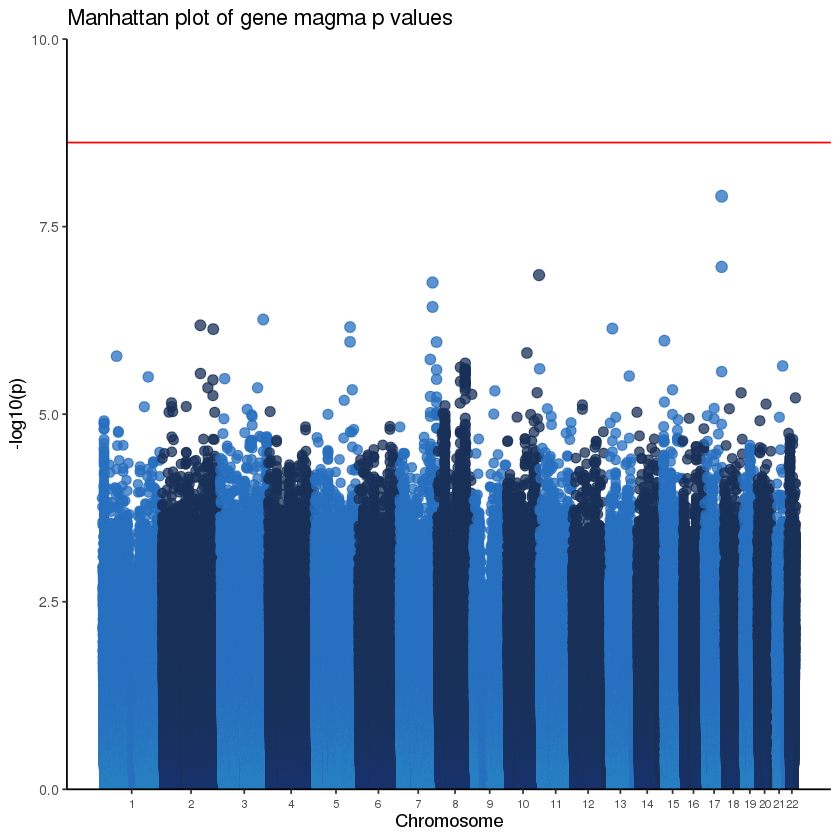

In [12]:
# Now time to draw the manhattan plot without filtering the most significant signals
manhplot <- ggplot(sig.dat, aes(x = BPcum, y = -log10(P), 
                             color = as.factor(CHR), size = -log10(P))) +
  geom_point(alpha = 0.75) +
  geom_hline(yintercept = -log10(sig), color = "red1") + 
  scale_x_continuous(label = axis.set$CHR, breaks = axis.set$center) +
  scale_y_continuous(expand = c(0,0), limits = c(0, ylim)) +
  scale_color_manual(values = rep(c("#276FBF", "#183059"), nCHR)) +
  scale_size_continuous(range = c(0.5,3)) +
  # Add highlighted points and annotation
  geom_point(data=subset(sig.dat, is_highlight=="yes"), color="orange", alpha=0.75) +
  # geom_label_repel(data=subset(sig.dat, is_annotate=="yes"), aes(label=symbol), size=2) +
  labs(x = "Chromosome", 
       y = "-log10(p)",
       title =paste0('Manhattan plot of gene magma p values')) + 
  theme_classic() +
  theme( 
    legend.position = "none",
    panel.border = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.text.x = element_text( size = 7, vjust = 0.5)
  )
png("/home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/f3393_f4825_2.manhattan.png", width = 6, height = 4, unit='in', res=300)
print(manhplot)
dev.off()
print(manhplot)

In [5]:
library('qqman')

lambda <- median(qchisq(1-data$"P",1), na.rm=TRUE)/qchisq(0.5,1)
ifelse(( min(data$"P", na.rm=TRUE)!=0), ylim <- abs(floor(log10(min(data$"P", na.rm=TRUE)))), ylim <- abs(floor(log10(2.225074e-308))))
# Creating manhattan plot
png('/home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/f3393_f4825_2.manhattan2.png', width = 6, height = 4, unit='in', res=300)
manhattan_plot <- manhattan(data, chr='CHR', bp='POS', snp='ID', p="P", main = 'Manhattan plot for f3393_f4825_2', ylim = c(0, ylim), cex = 0.6, 
cex.axis = 0.9, col = c("blue4", "orange3"), chrlabs = as.character(c(1:22)))
dev.off()
# Creating qqplot
png('/home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/f3393_f4825_2.qqplot.png', width = 5, height = 5, unit='in', res=300)
qq_plot <- qq(data$"P", main = 'QQ Plot for f3393_f4825_2', xlim = c(0, 8), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





[1] 8

png 
  2

png 
  2

> /home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/f3393_f4825_2.manhattan2.png (182.0 KiB):

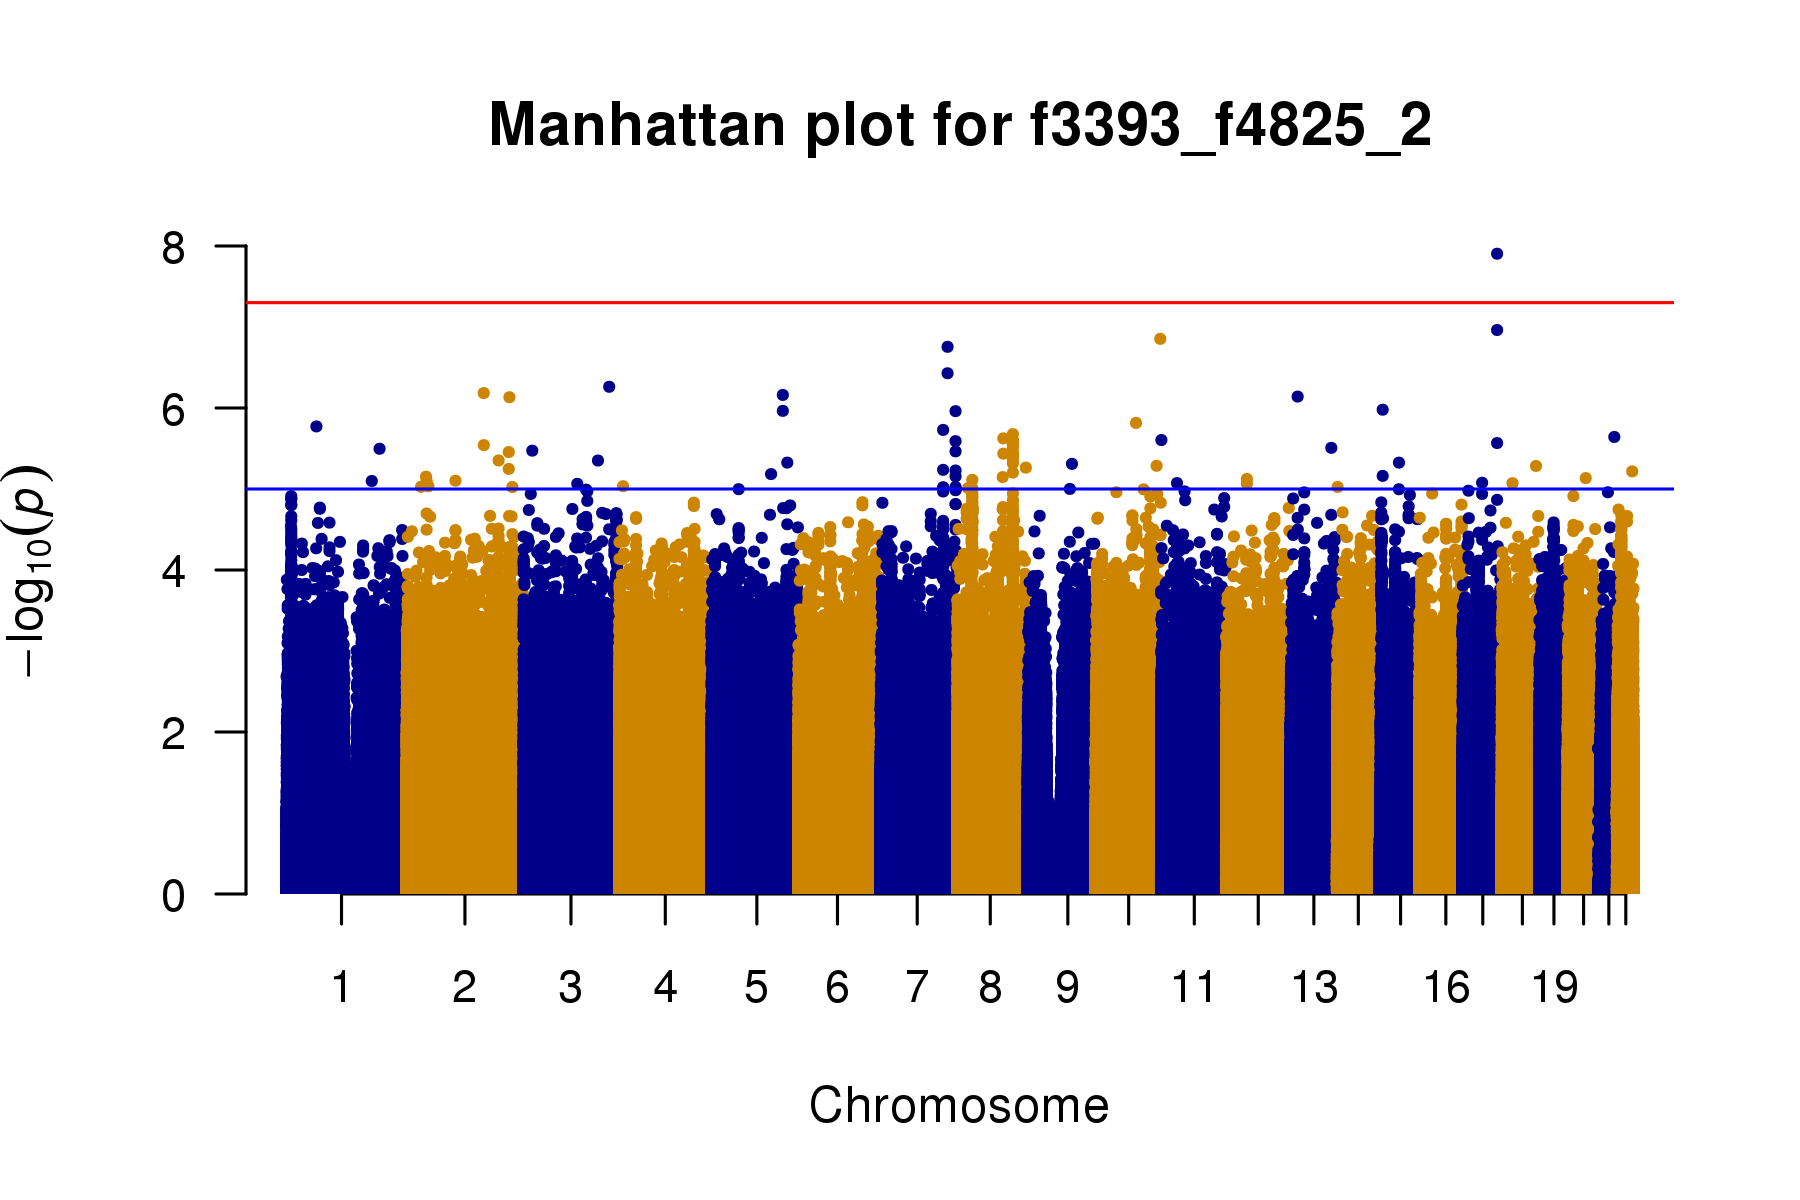

In [6]:
%preview /home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/f3393_f4825_2.manhattan2.png

> /home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/f3393_f4825_2.qqplot.png (76.0 KiB):

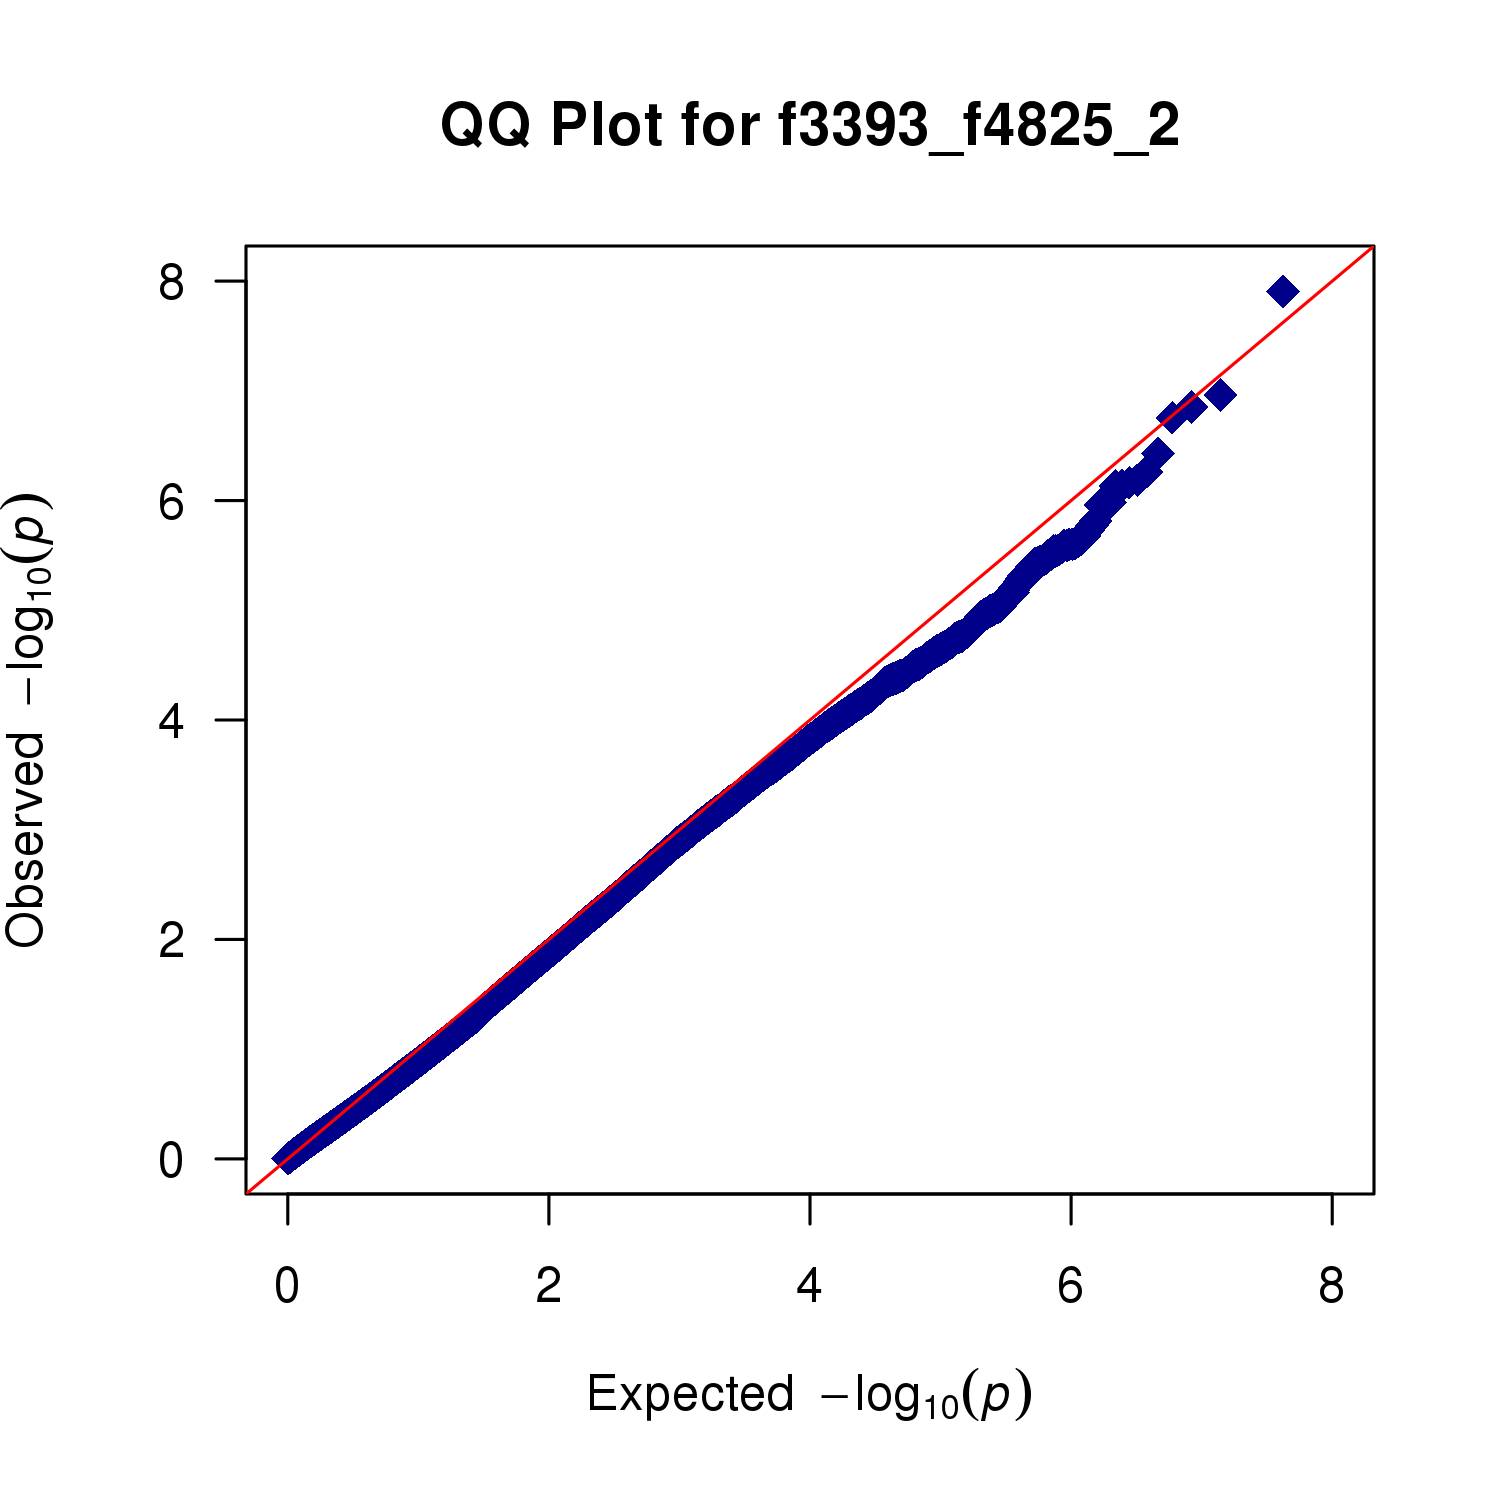

In [7]:
%preview /home/gl2776/UKBiobank/results/REGENIE_results/results_imputed_data/2022_02_15_regenie_interaction_noise/2022_02_18_f3393/f3393_f4825_2.qqplot.png